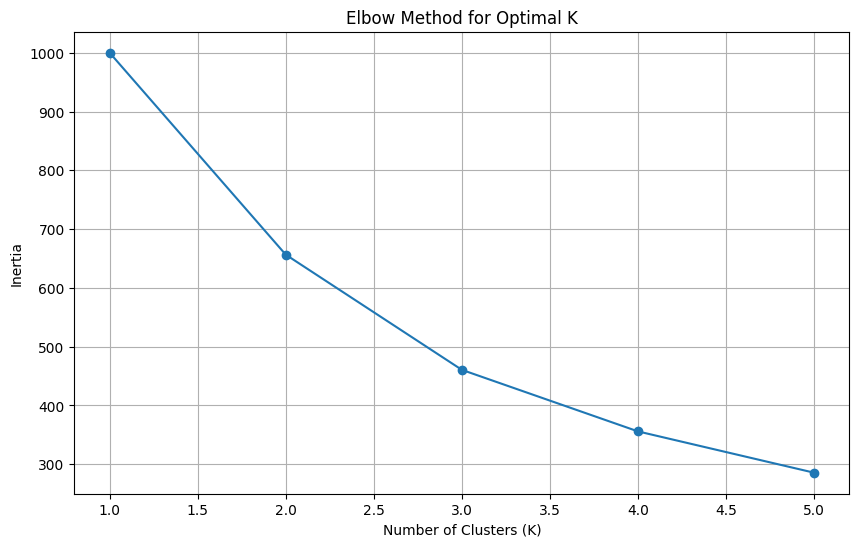

Centroids in original feature space (kWh and °C):
Centroid 0: Energy Consumption (x) = 260.4372887672682 kWh, Temperature (y) = 23.437315371751968 °C
Centroid 1: Energy Consumption (x) = 351.80181667083934 kWh, Temperature (y) = 23.204273525750686 °C
Centroid 2: Energy Consumption (x) = 300.6099762262344 kWh, Temperature (y) = 20.250058703918263 °C


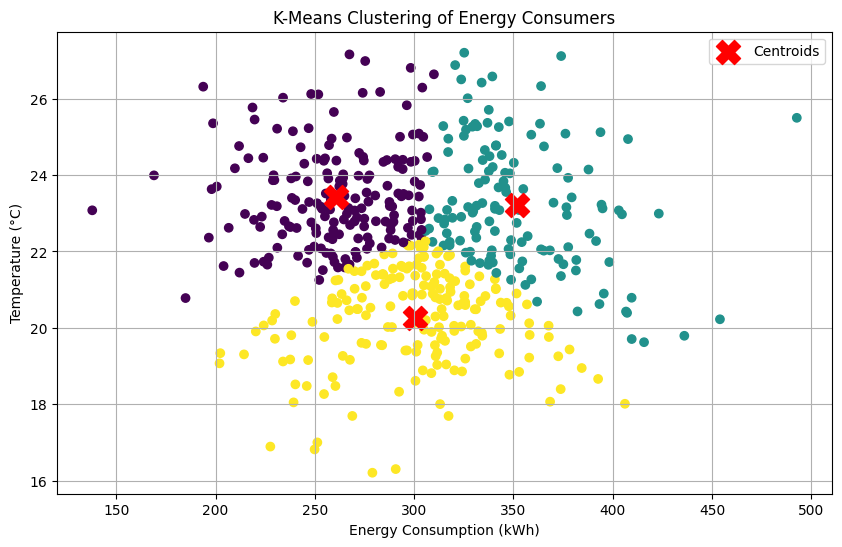

Final clusters and their counts:
Cluster
2    187
0    178
1    135
Name: count, dtype: int64
The new data point is assigned to cluster [2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [3]:
# # Import necessary libraries
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler
# from sklearn.cluster import KMeans

# # Step 1: Generate synthetic data
# # Set a random seed for reproducibility
# np.random.seed(42)

# # Generate synthetic data
# num_records = 10  # Set the number of records to 10
# timestamps = pd.date_range(start='2024-01-01', periods=num_records, freq='15T')  # Generate timestamps with 15-minute intervals

# # Simulated data
# energy_consumption = np.random.normal(loc=300, scale=50, size=num_records)  # Generate energy consumption data
# voltage = np.random.normal(loc=230, scale=5, size=num_records)  # Generate voltage data
# temperature = np.random.normal(loc=22, scale=2, size=num_records)  # Generate temperature data

# # Create User IDs cycling through 5 users
# user_ids = [f'User_{i % 5 + 1}' for i in range(num_records)]  # Generate user IDs

# # Create a DataFrame with the generated data
# data = pd.DataFrame({
#     'Timestamp': timestamps,  # Add timestamps
#     'Energy_Consumption_kWh': energy_consumption,  # Add energy consumption
#     'Voltage': voltage,  # Add voltage
#     'Temperature': temperature,  # Add temperature
#     'User_ID': user_ids  # Add user IDs
# })

# # Step 2: Data Preprocessing
# # Select relevant features for clustering
# features = data[['Energy_Consumption_kWh', 'Temperature']]  # Selecting energy consumption and temperature for clustering

# # Normalizing the data
# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(features)  # Scale features

# # Step 3: Apply K-Means Clustering
# # Determine the optimal number of clusters (K) using the Elbow Method
# inertia = []  # List to store inertia values
# K = range(1, 6)  # Testing cluster sizes from 1 to 5
# for k in K:
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(scaled_features)
#     inertia.append(kmeans.inertia_)

# # Plotting the Elbow method results
# plt.figure(figsize=(10, 6))
# plt.plot(K, inertia, marker='o')
# plt.title('Elbow Method for Optimal K')
# plt.xlabel('Number of Clusters (K)')
# plt.ylabel('Inertia')
# plt.grid()
# plt.show()

# # Choosing an optimal number of clusters (assume K=3 from elbow method)
# optimal_k = 3
# kmeans = KMeans(n_clusters=optimal_k, random_state=42)
# clusters = kmeans.fit_predict(scaled_features)  # Apply K-Means clustering

# # Step 4: Analyze and visualize clusters
# data['Cluster'] = clusters  # Add cluster labels to the DataFrame

# # Visualizing the clusters
# plt.figure(figsize=(10, 6))
# plt.scatter(data['Energy_Consumption_kWh'], data['Temperature'], c=data['Cluster'], cmap='viridis', marker='o')
# plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids', marker='X')
# plt.title('K-Means Clustering of Energy Consumers')
# plt.xlabel('Energy Consumption (kWh)')
# plt.ylabel('Temperature (°C)')
# plt.legend()
# plt.grid()
# plt.show()

# # Step 5: Conclusion
# # Display final clusters and their counts
# print("Final clusters and their counts:")
# print(data['Cluster'].value_counts())  # Print the count of records in each cluster




# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Step 1: Read CSV file into a DataFrame
data = pd.read_csv('synthetic_energy_consumption_data_500_entries.csv')  # Make sure the file is in the correct path

# Step 2: Data Preprocessing
# Select relevant features for clustering (Energy Consumption and Temperature)
features = data[['Energy_Consumption_kWh', 'Temperature']]

# Normalizing the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 3: Apply K-Means Clustering,Determine the optimal number of clusters (K) using the Elbow Method
inertia = []  # List to store inertia values
K = range(1, 6)  # Testing cluster sizes from 1 to 5
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow method results
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()
# Step 4: Choose an optimal number of clusters (assume K=3 from elbow method)
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)  # Apply K-Means clustering
# Add cluster labels to the DataFrame
data['Cluster'] = clusters
# Step 5: Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Energy_Consumption_kWh'], data['Temperature'], c=data['Cluster'], cmap='viridis', marker='o')

#plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids', marker='X')

# Inverse transform centroids to original scale
original_centroids = scaler.inverse_transform(kmeans.cluster_centers_)
# Plot the original centroids
plt.scatter(original_centroids[:, 0], original_centroids[:, 1], s=300, c='red', label='Centroids', marker='X')
x_values_original = original_centroids[:, 0]  # X values (Energy Consumption in kWh)
y_values_original = original_centroids[:, 1]  # Y values (Temperature in °C)

# Print the original scale values
print("Centroids in original feature space (kWh and °C):")
for i, (x, y) in enumerate(zip(x_values_original, y_values_original)):
    print(f"Centroid {i}: Energy Consumption (x) = {x} kWh, Temperature (y) = {y} °C")

plt.title('K-Means Clustering of Energy Consumers')
plt.xlabel('Energy Consumption (kWh)')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.grid()
plt.show()
# Conclusion: Display final clusters and their counts
print("Final clusters and their counts:")
print(data['Cluster'].value_counts())  # Print the count of records in each cluster

new_data = np.array([[150, 16]])
scaled_new_data = scaler.transform(new_data)
predicted_cluster = kmeans.predict(scaled_new_data)
print(f"The new data point is assigned to cluster {predicted_cluster}")




